Write a recursive function using only the children (right and left)/threshold/feature/value methods from sklearn’s _tree class to print out the predicted value for a given set of X features for 1 row of the airq data. 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    int64  
 1   Solar.R  111 non-null    float64
 2   Wind     116 non-null    float64
 3   Temp     116 non-null    int64  
 4   Month    116 non-null    int64  
 5   Day      116 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 5.6 KB
 --- T

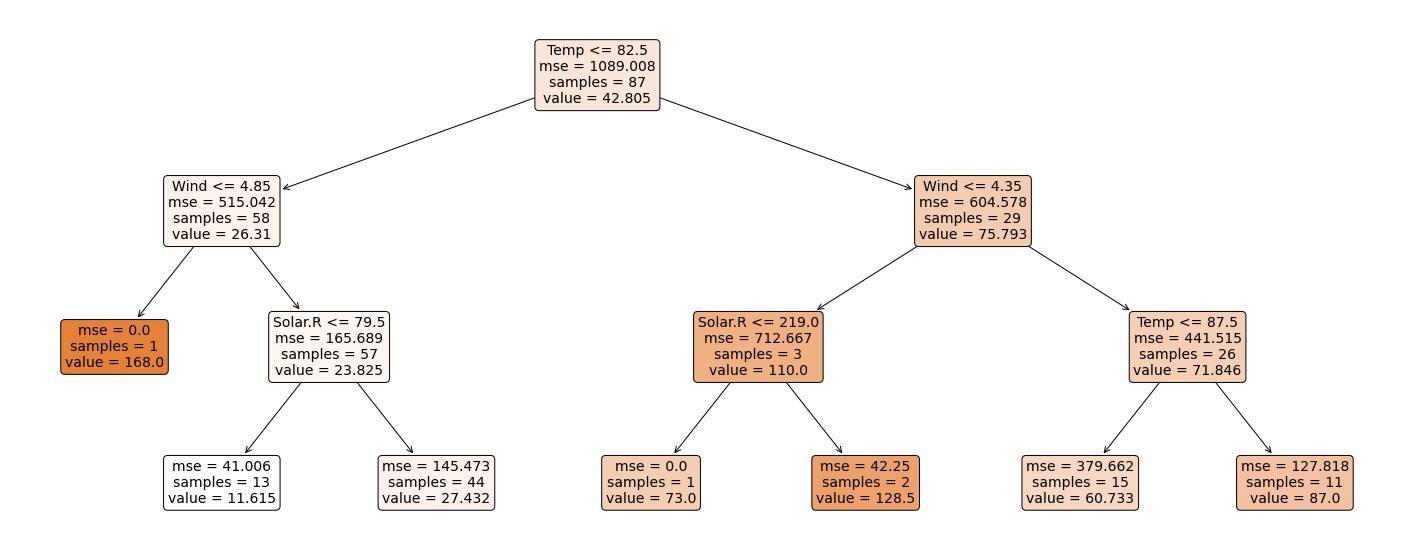

In [0]:
# My recursive function works to show how it tree works from the root node, and i display all 
# the tree information, I know it isn't exactly what was asked but the API was hard to understand
# I make use of all the logic in the functions below all aptly named varitions of recursive functions





from google.colab import drive

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



drive.mount('/content/drive')
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_4/airq'

airq = pd.read_csv(my_path)
airq = airq.iloc[:,1:]
airq.head()
airq.info()
airq["Solar.R"] = airq["Solar.R"].fillna(round(airq["Solar.R"].mean()))

X = airq.iloc[:,1:]
Y = pd.DataFrame(airq.iloc[:,0])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

clf = tree.DecisionTreeRegressor(max_depth = 3)
clf = clf.fit(X_train,y_train)

tree_ = clf.tree_

#EXTRACTING TREE ATRIBUTES
n_nodes = tree_.node_count
children_left = tree_.children_left
children_right = tree_.children_right
feature = tree_.feature
threshold = tree_.threshold
depth = np.zeros(shape = n_nodes, dtype = np.int64)
leaves = np.zeros(shape = n_nodes, dtype = bool)
stack = [(0,-1)]

# Getting leave node information inspired from sklearn documentation
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        leaves[node_id] = True


# PRINTING TREE INFORMATION 
print(" --- TREE INFORMATION ---")

for i in range(n_nodes):
    if leaves[i]:
        print("%snode=%s leaf node." % (depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
        

# VISUALIZING ABOVE TREE RELATIONS        
plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=airq.columns.tolist()[1:], 
              class_names=airq.columns.tolist()[0], 
              filled=True, 
              rounded=True, 
              fontsize=14)

x = 1
#print("Tree features are ",(tree_.feature))
feature_names = airq.columns.tolist()[1:]
#print(feature_names)
feature_name = [feature_names[i] for i in tree_.feature]  
#print(feature_name)

#STORING ALL PATHS FOR THE DATASET TO INDICATE WHETHER IT IS A NODE OR NOT,USE THAT INFO TO GET EACH NODES RESPECTIVE INDEX
node_indicator = clf.decision_path(X)
leave_id = clf.apply(X)
sample_id = i = 1
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

tree_code(tree_, feature_names, feature_name) # fn that recursively traverses the whole tree and prints structure code wise
recursive(1)  # Recursive fn for each row of data predicts 

#for i in range(n_nodes):
 # row = X.iloc[sample_id, feature[i]]
  #tryharder(sample_id, i, row, depth, children_left, children_right, feature, threshold)
  #recursivefn(X,Y,row, x,tree_, depth, leaves, )

In [0]:
def recursive(x):
  if x >= (len(X)):
    return
  print(X.iloc[x:x+1,:])
  print("-------------------------")
  print("%s node = %s leaf" %(depth[i] * "\t", x))
  y_pred = clf.predict(X.iloc[x:x+1,:])
  print("--- PREDICTION IS %s " %y_pred)
  print("--- PATH TAKEN IS %s "%(clf.decision_path(X.iloc[x:x+1,:])))
  recursive(x+1)



In [0]:
from sklearn.tree import _tree

def tree_code(tree_, feature_names, feature_name):
 
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [0]:
r(X, t, i):
  if v(i) not -1
    rtn
  if x(feature(i)) >= threshold[i]:
    r(x, t, rightneigh)
  else:
    r(x,t, leftneigh)

In [0]:
def recursivefn(X,Y, row, x,tree_, depth, leaves ):
  x_feature = []
  x_threshold = []


  x_feature = (X.iloc[x, tree_.feature[x]]).copy()
  x_threshold = (tree_.threshold[x]).copy()
  
  if x > row:
    return
  
  if leaves[x]:
    print("-------------------------")
    print("%s node = %s leaf" %(depth[i] * "\t", x))
    y_pred = clf.predict(X.iloc[x:x+1,:])
    print("--- PREDICTION IS %s " %y_pred)
    print("--- PATH TAKEN IS %s "%(clf.decision_path(X.iloc[x:x+1,:])))

  
  if (x_feature >= x_threshold):
    x = tree_.children_right[x]
    recursivefn(X,Y, row, x, tree_, depth, leaves)
  else:
    x = tree_.children_left[x]
    recursivefn(X,Y,row,x,tree_,depth, leaves)
